<a href="https://colab.research.google.com/github/alexander-billings/food-sales-predictions/blob/master/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Reading data from public link to Google Drive
food_sales_df = pd.read_csv("https://drive.google.com/uc?id=1MDPFwAeeUclAnG4l2UdGmfyYAXSXbrSm&export=download")

# Verifying the data loaded properly
food_sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [3]:
# Exploring the data set
print("Dataframe rows:   ", food_sales_df.shape[0])
print("Dataframe columns:", food_sales_df.shape[1], '\n')

print("Checking dataframe data types:")
print(food_sales_df.dtypes, '\n')

print("Checking for duplicated rows:")
print("Found", food_sales_df.duplicated().sum(), "duplicated rows\n")

print("Checking for null or missing values:")
food_sales_df.isna().sum()

Dataframe rows:    8523
Dataframe columns: 12 

Checking dataframe data types:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object 

Checking for duplicated rows:
Found 0 duplicated rows

Checking for null or missing values:


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
# Checking to see if I can fill in gaps where Outlet_Size is missing by using row where
# it isn't for that Outlet_Identifier
food_sales_df.loc[: , ['Outlet_Identifier', 'Outlet_Size']].groupby("Outlet_Identifier").nunique(dropna=False)

,Outlet_Size
Outlet_Identifier,
OUT010,1
OUT013,1
OUT017,1
OUT018,1
OUT019,1
OUT027,1
OUT035,1
OUT045,1
OUT046,1


In a real-world scenario I would attempt to reach the subject matter experts regarding the data to fill in. Considering I'm unable to programmatically fill the values accuratly, I will just mark the missing sizes with "missing_size" so I could easily fill in later if possible.

In [5]:
food_sales_df['Outlet_Size'].fillna(value='missing_size', inplace=True)
food_sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Checking to see if I can fill in gaps where Item_Weight is missing by using row where
# it isn't for that Item_Identifier
food_sales_df.loc[: , ['Item_Identifier', 'Item_Weight']].groupby("Item_Identifier").nunique(dropna=False)

,Item_Weight
Item_Identifier,
DRA12,1
DRA24,2
DRA59,2
DRB01,2
DRB13,1
...,...
NCZ30,2
NCZ41,1
NCZ42,1


Given there are Item_Identifiers with null and non-null values, I would consider programmatically filling some of these in. In the meantime, considering some Item_Identifiers do not have weights at all, I would consider dropping the rows for now until a script can be written or a module found to use existing weights to fill missing ones.

In [9]:
food_sales_df.dropna(inplace=True)
food_sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
# Checking for inconsistent categories
print(food_sales_df['Item_Fat_Content'].unique())
print(food_sales_df['Item_Type'].unique())
print(food_sales_df['Outlet_Location_Type'].unique())
print(food_sales_df['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Breads' 'Canned' 'Starchy Foods'
 'Others' 'Seafood']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store']


Item_Fat_Content has inconsistencies. Will replace the following:

LF, low fat = Low Fat

reg = Regular

In [11]:
food_sales_df.replace(to_replace='LF', value='Low Fat', inplace=True)
food_sales_df.replace(to_replace='low fat', value='Low Fat', inplace=True)
food_sales_df.replace(to_replace='reg', value='Regular', inplace=True)

In [12]:
# Verifying replacement
print(food_sales_df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [19]:
# Printing the min, max, and mean of numeric columns
def print_min_max_mean(column):
  print(column.name)
  print("Min: ", column.min())
  print("Max: ", column.max())
  print("Mean:", column.mean(), '\n')
  return

print_min_max_mean(food_sales_df['Item_Weight'])
print_min_max_mean(food_sales_df['Item_Visibility'])
print_min_max_mean(food_sales_df['Item_MRP'])
print_min_max_mean(food_sales_df['Outlet_Establishment_Year'])
print_min_max_mean(food_sales_df['Item_Outlet_Sales'])

# Full dataframe description
food_sales_df.describe()

Item_Weight
Min:  4.555
Max:  21.35
Mean: 12.857645184136183 

Item_Visibility
Min:  0.0
Max:  0.311090379
Mean: 0.06396338186288959 

Item_MRP
Min:  31.49
Max:  266.8884
Mean: 141.2406832577905 

Outlet_Establishment_Year
Min:  1987
Max:  2009
Mean: 2000.4909348441927 

Item_Outlet_Sales
Min:  33.29
Max:  10256.649
Mean: 2118.626808130321 



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000
mean,12.857645,0.063963,141.240683,2000.490935,2118.626808
std,4.643456,0.048625,62.411888,6.588984,1533.445842
min,4.555000,0.000000,31.490000,1987.000000,33.290000
25%,8.773750,0.026768,94.143600,1997.000000,922.798800
50%,12.600000,0.052493,142.729900,2002.000000,1789.670400
75%,16.850000,0.092774,186.024000,2007.000000,2966.139000
max,21.350000,0.311090,266.888400,2009.000000,10256.649000


##Exploratory Analysis

In [100]:
print(len(food_sales_df['Item_Identifier'].unique()), 'unique item identifiers')

1555 unique item identifiers


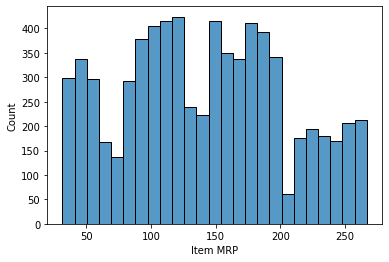

In [32]:
sns.histplot(data=food_sales_df, x='Item_MRP');
plt.xlabel('Item MRP');

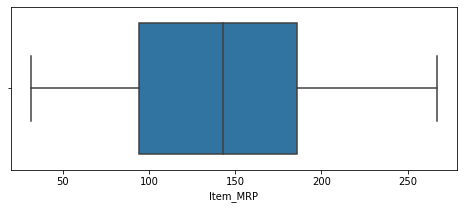

In [66]:
plt.figure(figsize=(8,3))
sns.boxplot(x=food_sales_df['Item_MRP'])

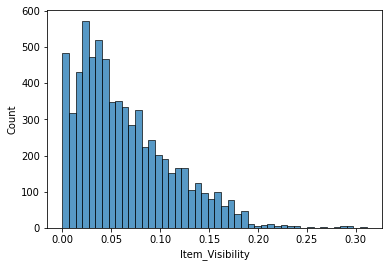

In [33]:
sns.histplot(data=food_sales_df['Item_Visibility']);

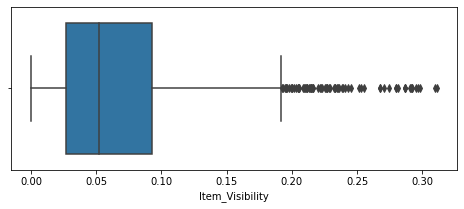

In [61]:
plt.figure(figsize=(8,3))
sns.boxplot(x=food_sales_df['Item_Visibility']);

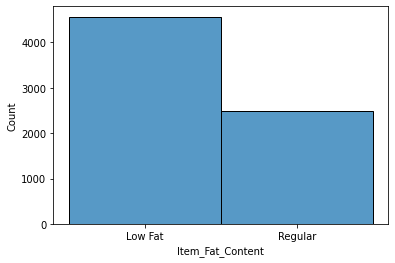

In [35]:
sns.histplot(data=food_sales_df['Item_Fat_Content']);

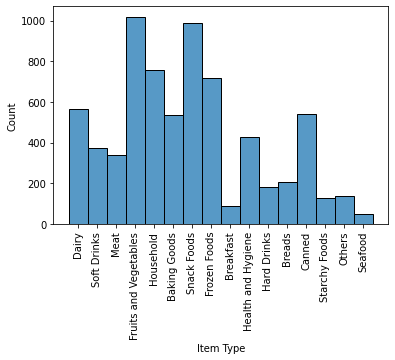

In [40]:
sns.histplot(data=food_sales_df, x='Item_Type')
plt.xlabel('Item Type')
plt.xticks(rotation=90);

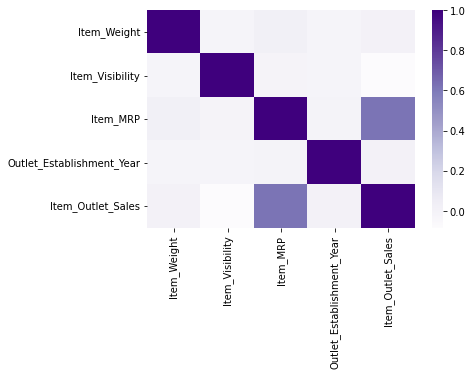

In [75]:
# First checking a heatmap to confirm some initial observations
food_sales_corr = food_sales_df.corr()
sns.heatmap(data=food_sales_corr, cmap='Purples')
